In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import load_model

In [2]:
df = pd.read_csv('fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


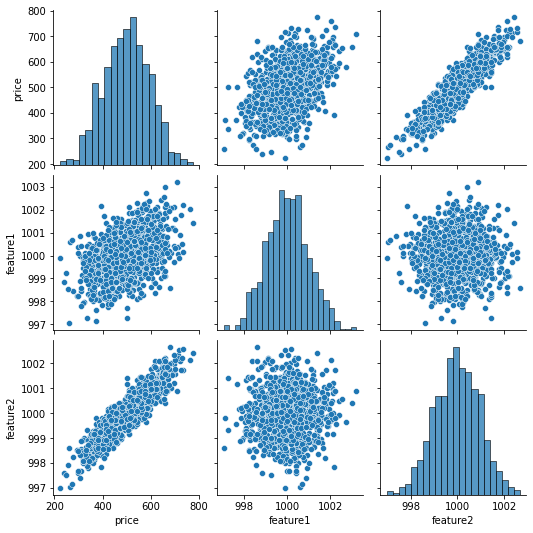

In [3]:
sns.pairplot(df)

In [4]:
X = df[['feature1','feature2']].values
y = df['price'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [6]:
scaler = MinMaxScaler()

In [7]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# model = Sequential([Dense(4,activation='relu'),
#                     Dense(2,activation='relu'),
#                     Dense(1)])

# Alternatively

model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [9]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 950us/step - loss: 256404.7969
Epoch 2/250
22/22 [==============================] - 0s 960us/step - loss: 256204.9375
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 255995.4062
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 255759.5469
Epoch 5/250
22/22 [==============================] - 0s 970us/step - loss: 255492.4375
Epoch 6/250
22/22 [==============================] - 0s 948us/step - loss: 255189.0000
Epoch 7/250
22/22 [==============================] - 0s 996us/step - loss: 254846.7188
Epoch 8/250
22/22 [==============================] - 0s 979us/step - loss: 254461.8750
Epoch 9/250
22/22 [==============================] - 0s 924us/step - loss: 254028.7344
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 253548.5469
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 253019.8594
Epoch 12/250
22/22 [=============================

In [10]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

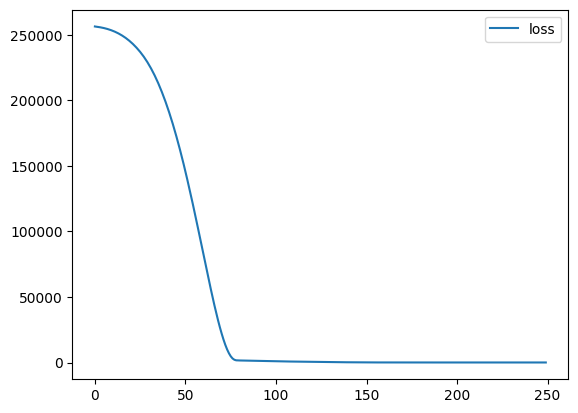

In [11]:
loss_df.plot()

In [12]:
model.evaluate(X_test,y_test,verbose=0)

25.79117774963379

In [13]:
model.evaluate(X_train,y_train,verbose=0)

23.95003318786621

In [14]:
test_predictions = model.predict(X_test)

In [15]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [16]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [17]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [18]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [19]:
pred_df.columns = ['Test True Y','Model Predictions']
pred_df

,Test True Y,Model Predictions
0,402.296319,405.897797
1,624.156198,624.553345
2,582.455066,593.089111
3,578.588606,573.140381
4,371.224104,367.144745
...,...,...
295,525.704657,529.879517
296,502.909473,516.130981
297,612.727910,610.640503
298,417.569725,417.588593


<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

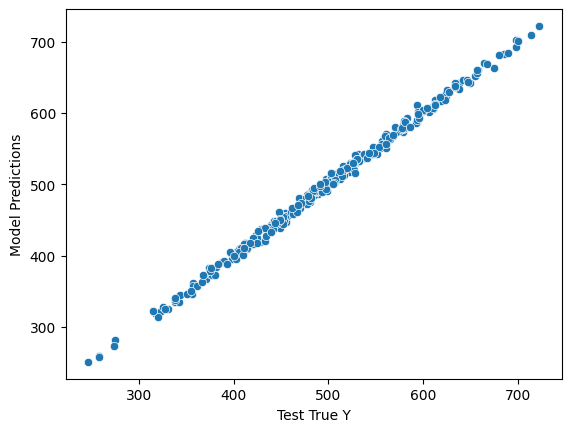

In [20]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

In [21]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.100879110381675

In [22]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

25.79118286601389

In [23]:
# Save the model
model.save('my_gem_model.h5')

In [24]:
# Load the model for future imports
later_model = load_model('my_gem_model.h5')